In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/StudentsPerformance.csv")

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [ ]:
from sklearn import preprocessing

In [ ]:
label =  preprocessing.LabelEncoder()

In [ ]:
df['test preparation course']=label.fit_transform(df['test preparation course'])

In [ ]:
df['test preparation course'].unique()

array([1, 0])

<Axes: ylabel='math score'>

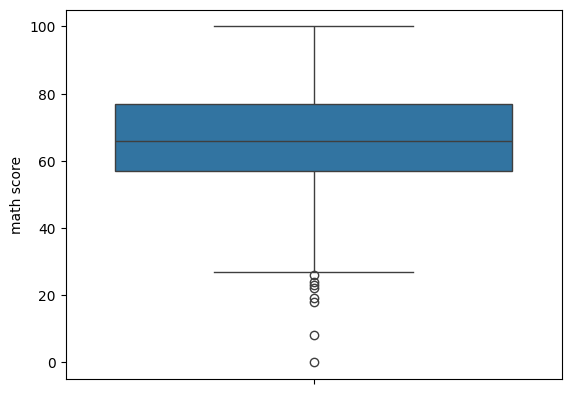

In [ ]:
sns.boxplot(y=data['math score'])

<Axes: ylabel='reading score'>

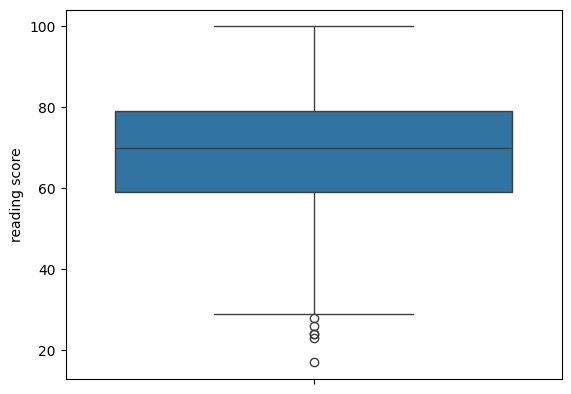

In [ ]:
sns.boxplot(y=data['reading score'])

<Axes: ylabel='writing score'>

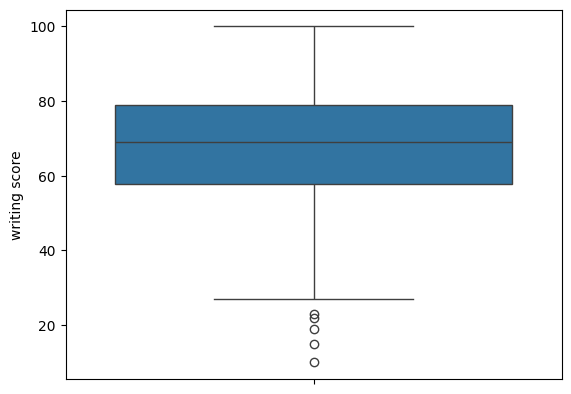

In [ ]:
sns.boxplot(y=data['writing score'])

<Axes: >

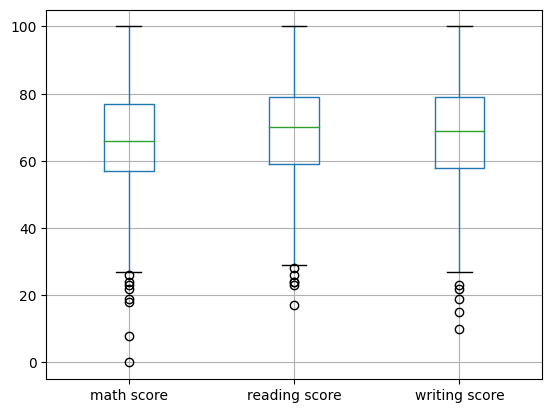

In [ ]:
col=['math score','reading score','writing score']
df.boxplot(col)


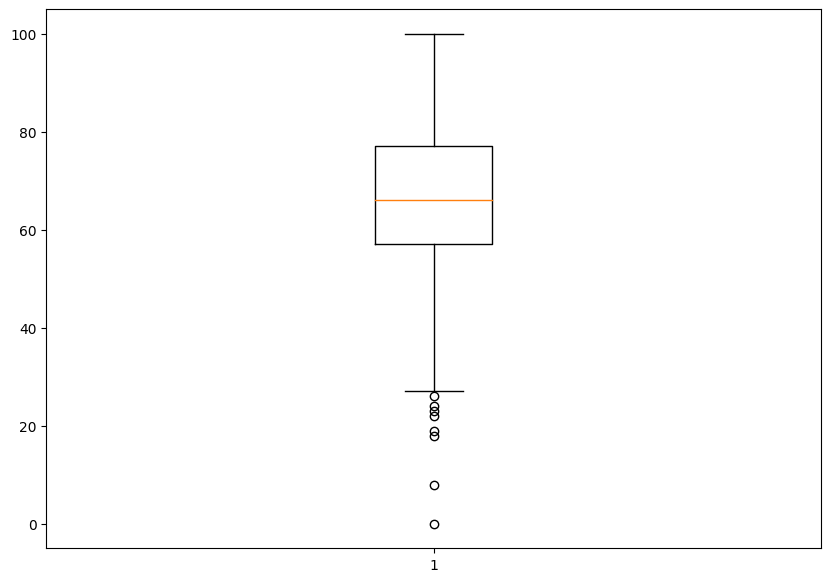

In [ ]:
data = np.array(df['math score'])
fig=plt.figure(figsize=(10,7))
plt.boxplot(data)
plt.show()

In [ ]:
data = np.array(df['math score'])
q1,q3=np.percentile(data,[25,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
outliers = []
for x in data:
  if x<lower_bound or x>upper_bound:
    outliers.append(x)
print("Lower bound")
print(lower_bound)
print("Upper bound")
print(upper_bound)
print("Outliers")
print(outliers)

Lower bound
27.0
Upper bound
107.0
Outliers
[18, 0, 22, 24, 26, 19, 23, 8]


In [ ]:
values_to_replace = [18, 0, 22, 24, 26, 19, 23, 8]
replacement_value = pd.NA
df['math score'].replace(values_to_replace, replacement_value, inplace=True)

In [ ]:
df['math score'].isnull().sum()

8

In [ ]:
avg_math = df['math score'].mean()

In [ ]:
df['math score'].fillna(value=avg_math, inplace=True)

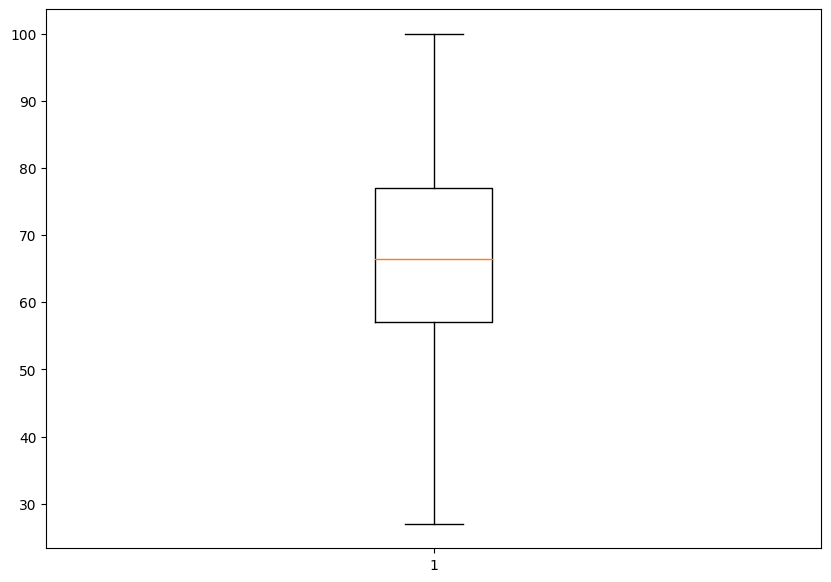

In [ ]:
data2 = np.array(df['math score'])
fig=plt.figure(figsize=(10,7))
plt.boxplot(data2)
plt.show()

<Axes: ylabel='Frequency'>

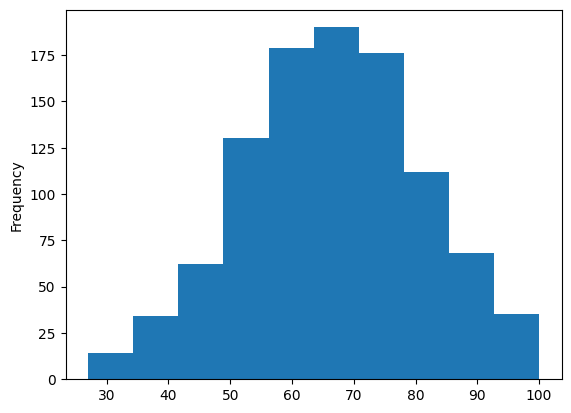

In [ ]:
df['math score'].plot(kind='hist')


In [ ]:
df['log_math']=np.log10(df['math score'])

In [ ]:
df2=df

In [ ]:
import math
for i in df2.index:
  if df2['math score'][i] <= 0:
    df2.at[i,'math score']=0.000000001
  else:
    df2.at[i,'math score']=math.log(df2['math score'][i])


In [ ]:
df.dtypes



gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course          int64
math score                     float64
reading score                    int64
writing score                    int64
log_math                       float64
dtype: object

In [ ]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [ ]:
df['lunch']=label.fit_transform(df['lunch'])
df['gender']=label.fit_transform(df['gender'])
df['race/ethnicity']=label.fit_transform(df['race/ethnicity'])
df['parental level of education']=label.fit_transform(df['parental level of education'])

In [ ]:
df2.skew(axis = 0, skipna= True)

gender                         0.072155
race/ethnicity                -0.144709
parental level of education   -0.030147
lunch                         -0.606955
test preparation course       -0.593282
math score                    -1.683495
reading score                 -0.259105
writing score                 -0.289444
log_math                      -0.731749
dtype: float64

In [ ]:
df['gender'].value_counts()

gender
0    518
1    482
Name: count, dtype: int64

In [ ]:
df['lunch'].value_counts()

lunch
1    645
0    355
Name: count, dtype: int64

In [ ]:
import seaborn as sns

In [ ]:
import scipy.stats as stats

In [ ]:
# Filter out rows where 'reading score' is missing or zero
data_filtered = df2[df2['reading score'].notnull() & (df2['reading score'] > 0)]

# Check if the filtered DataFrame is empty
if data_filtered.empty:
    print("The filtered DataFrame is empty. Cannot apply Box-Cox transformation.")
else:
    # Apply the Box-Cox transformation
    boxcox = stats.boxcox(data_filtered['reading score'])[0]


In [ ]:
pd.Series(boxcox).skew()

-0.03186244846337844

In [ ]:
epsilon = 0.001
df2['reading score'] = df2['reading score'] + epsilon
boxcox = stats.boxcox(df2['reading score'])[0]
pd.Series(boxcox).skew()

-0.03186127996612415

In [ ]:
boxcox=stats.boxcox(df2['reading score'])[0]
pd.Series(boxcox).skew()

-0.03186127996612415

In [ ]:
import seaborn as sns

<ipython-input-217-e409322c2895>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.skew(axis = 0, skipna= True))


<Axes: ylabel='Density'>

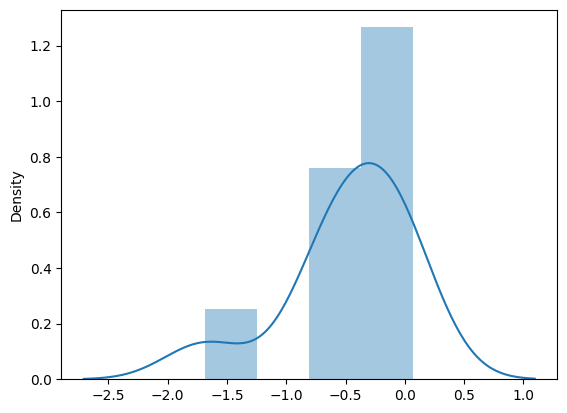

In [ ]:
sns.distplot(df2.skew(axis = 0, skipna= True))